### Example showcasing how to access the generated and downloaded xarrays

In [1]:
import xarray as xr
from Functions import bokeh_plot , crop_show , bokeh_max_min_plot
from Functions import shapefile_generator 
import matplotlib.pyplot as plt 

# Open NetCDF4 file
ds = xr.open_dataset('Sample_xarrays_generated/India_Goa_RCP4.5_2011-2040_marginal.nc')

### Selecting the geometry for plotting 

In [2]:
# Select your geometry so that visualisations can be rendered

geometry = shapefile_generator('India' , 'Goa')

### Observing the whole dataset 

In [3]:
ds

<xarray.Dataset>
Dimensions:                    (x: 9, y: 12)
Coordinates:
    latitude                   (x, y) float64 ...
    longitude                  (x, y) float64 ...
Dimensions without coordinates: x, y
Data variables: (12/79)
    Alfalfa                    (y, x) float64 ...
    Banana                     (y, x) float64 ...
    Barley                     (y, x) float64 ...
    Biomass_highland_sorghum   (y, x) float64 ...
    Biomass_lowland_sorghum    (y, x) float64 ...
    Biomass_sorghum            (y, x) float64 ...
    ...                         ...
    Winter_rye                 (y, x) float64 ...
    Winter_wheat               (y, x) float64 ...
    Yam                        (y, x) float64 ...
    Yellow_yam                 (y, x) float64 ...
    max_values                 (y, x) float64 ...
    max_crops                  (y, x) object ...
Attributes:
    net_sum:  25515401.56
    units:    PetaJoules

### Extracting the latitude values 

In [4]:
latitude_values = ds.coords['latitude'].values
latitude_values

array([[15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 15.33333333, 15.25      , 15.16666667, 15.08333333,
        15.        , 14.91666667],
       [15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 15.33333333, 15.25      , 15.16666667, 15.08333333,
        15.        , 14.91666667],
       [15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 15.33333333, 15.25      , 15.16666667, 15.08333333,
        15.        , 14.91666667],
       [15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 15.33333333, 15.25      , 15.16666667, 15.08333333,
        15.        , 14.91666667],
       [15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 15.33333333, 15.25      , 15.16666667, 15.08333333,
        15.        , 14.91666667],
       [15.83333333, 15.75      , 15.66666667, 15.58333333, 15.5       ,
        15.41666667, 1

### Extracting a particular data variable

In [5]:
# Accessing variables
data_variable_values = ds.variables['Biomass_lowland_sorghum'].values
data_variable_values

array([[     0.  ,      0.  , 612609.14,      0.  ,      0.  ,      0.  ,
             0.  ,      0.  ,      0.  ],
       [612364.5 , 612639.72, 610896.66,      0.  ,      0.  ,      0.  ,
             0.  ,      0.  ,      0.  ],
       [     0.  , 608175.04, 607104.74, 607349.38,      0.  , 614658.  ,
        615758.88,      0.  ,      0.  ],
       [     0.  , 604566.6 , 603710.36, 603802.1 , 604688.92, 604872.4 ,
        607379.96,      0.  ,      0.  ],
       [     0.  ,      0.  , 602059.04, 602884.7 , 604230.22, 604841.82,
        609031.28,      0.  ,      0.  ],
       [     0.  ,      0.  , 599949.02, 601569.76, 603924.42, 604658.34,
        607288.22, 628174.36,      0.  ],
       [     0.  ,      0.  ,      0.  , 598756.4 , 600591.2 , 604536.02,
        608083.3 ,      0.  ,      0.  ],
       [     0.  ,      0.  ,      0.  , 598144.8 , 601172.22, 604291.38,
        607227.06,      0.  ,      0.  ],
       [     0.  ,      0.  ,      0.  , 602884.7 , 607227.06, 609153.6 

### Visualising any array

In [6]:
# This is used to plot any array and will redirect you to a page where you can easily visualise which pixel in the 
# selected region contains what value 

bokeh_plot(geometry , data_variable_values) 

In [7]:
# Incase the variation among the maximum and minimum value is not high , the above plot will not show the variation across the region.
# Therefore , this function shows the variation in value of each pixel with respect to the minimum and maximum value

bokeh_max_min_plot(geometry , data_variable_values) 

### Visualising crop distribution in the Marginal Land

#### Remark : 
The upcoming plot highlights the regions of the marginal land covered by different crops and shows us the crop distribution across it. However, it is to be kept in mind that the complete pixels being shown are not under marginal land , only a certain portion of them is marginal and that piece of marginal land grows the corresponding coloured crop. 

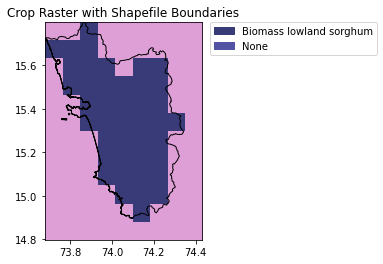

In [8]:
# Visualising the marginal land crop distribution plots using crop_show.

max_crops_array = ds.variables['max_crops'].values
crop_distribution = crop_show(max_crops_array, geometry)